# EPA Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from geopandas import GeoDataFrame
import glob

## NO2 Dataset

Cleaned version of this dataset is saved on github as EPA_NO2_Cleaned

In [6]:
# use your path
frame_NO2 = read_files('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/no2')

NameError: name 'read_files' is not defined

In [5]:
frame_NO2 = frame_NO2.loc[frame_NO2['City Name']=='New York']

NameError: name 'frame_NO2' is not defined

In [54]:
print('There are',len(frame_NO2['Site Num'].unique()),'sites measuring NO2 in NYC, which are located in:',\
      frame_NO2['County Name'].unique())

There are 4 sites measuring NO2 in NYC, which are located in: ['Bronx' 'Queens']


In [55]:
frame_NO2.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [59]:
#keeping relevant columns only
frame_NO2 = frame_NO2[['County Code','Site Num','Parameter Code','Latitude', 'Longitude', 'Datum',
                       'Parameter Name', 'Sample Duration','Date Local', 'Units of Measure',
                       'Observation Count', 'Observation Percent','Arithmetic Mean','1st Max Value',
                       '1st Max Hour', 'AQI','Local Site Name', 'Address','County Name']]
frame_NO2.head()

,County Code,Site Num,Parameter Code,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Date Local,Units of Measure,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Local Site Name,Address,County Name
95729,5,110,42602,40.816,-73.902,WGS84,Nitrogen dioxide (NO2),1 HOUR,2016-01-01,Parts per billion,24,100.0,11.345833,17.7,18,16,IS 52,IS 52 681 KELLY ST,Bronx
95730,5,110,42602,40.816,-73.902,WGS84,Nitrogen dioxide (NO2),1 HOUR,2016-01-02,Parts per billion,24,100.0,15.683333,22.3,22,21,IS 52,IS 52 681 KELLY ST,Bronx
95731,5,110,42602,40.816,-73.902,WGS84,Nitrogen dioxide (NO2),1 HOUR,2016-01-03,Parts per billion,24,100.0,19.554167,30.1,8,28,IS 52,IS 52 681 KELLY ST,Bronx
95732,5,110,42602,40.816,-73.902,WGS84,Nitrogen dioxide (NO2),1 HOUR,2016-01-04,Parts per billion,24,100.0,12.645833,21.1,0,20,IS 52,IS 52 681 KELLY ST,Bronx
95733,5,110,42602,40.816,-73.902,WGS84,Nitrogen dioxide (NO2),1 HOUR,2016-01-05,Parts per billion,24,100.0,22.712500,39.1,19,37,IS 52,IS 52 681 KELLY ST,Bronx


In [60]:
frame_NO2.describe() #values appear to be reasonable

,County Code,Site Num,Parameter Code,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
count,11081.000000,11081.000000,11081.0,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000,11081.000000
mean,36.871853,123.317751,42602.0,40.799408,-73.860207,23.357368,97.346088,16.801550,30.625819,11.705712,28.482628
std,37.504303,8.761749,0.0,0.056616,0.034935,1.874608,7.790753,7.989812,12.504717,8.077632,11.886052
min,5.000000,110.000000,42602.0,40.736140,-73.902000,3.000000,13.000000,2.304167,3.100000,0.000000,3.000000
25%,5.000000,110.000000,42602.0,40.736140,-73.902000,24.000000,100.000000,10.912500,21.000000,5.000000,20.000000
50%,5.000000,124.000000,42602.0,40.816000,-73.878090,24.000000,100.000000,15.258333,29.700000,8.000000,27.000000
75%,81.000000,133.000000,42602.0,40.867900,-73.821530,24.000000,100.000000,21.200000,39.100000,20.000000,37.000000
max,81.000000,133.000000,42602.0,40.867900,-73.817694,24.000000,100.000000,71.550000,121.700000,23.000000,105.000000


In [235]:
frame_NO2 = frame_NO2.sort_values(by = 'Date Local').reset_index()

In [239]:
frame_NO2['Date Local'] =  pd.to_datetime(frame_NO2['Date Local'], format='%Y-%m-%d')

In [243]:
frame_NO2.to_csv('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/no2/EPA_NO2_cleaned.csv')

In [8]:
#if you want to read the cleaned version
path = '/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/no2/'
frame_NO2 = pd.read_csv(path+'EPA_NO2_cleaned.csv')

## SO2 Dataset

Cleaned version of this dataset is saved on github as EPA_SO2_Cleaned

In [75]:
# use your path
frame_SO2 = read_files('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/so2')

In [77]:
frame_SO2.shape

(3175073, 30)

In [78]:
frame_SO2 = frame_SO2.loc[frame_SO2['City Name']=='New York']
print('There are',len(frame_SO2['Site Num'].unique()),'sites measuring SO2 in NYC, which are located in:',\
      frame_SO2['County Name'].unique())

There are 3 sites measuring SO2 in NYC, which are located in: ['Bronx' 'Queens']


In [79]:
frame_SO2.columns

Index(['Unnamed: 0', 'County Code', 'Site Num', 'Parameter Code', 'Latitude',
       'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Date Local',
       'Units of Measure', 'Observation Count', 'Observation Percent',
       'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'AQI',
       'Local Site Name', 'Address', 'County Name', 'State Code', 'POC',
       'Pollutant Standard', 'Event Type', 'Method Code', 'Method Name',
       'State Name', 'City Name', 'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [80]:
#keeping relevant columns only
frame_SO2 = frame_SO2[['County Code','Site Num','Parameter Code','Latitude', 'Longitude', 'Datum',
                       'Parameter Name', 'Sample Duration','Date Local', 'Units of Measure',
                       'Observation Count', 'Observation Percent','Arithmetic Mean','1st Max Value',
                       '1st Max Hour', 'AQI','Local Site Name', 'Address','County Name']]
frame_SO2.head()

,County Code,Site Num,Parameter Code,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Date Local,Units of Measure,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Local Site Name,Address,County Name
200236,5,110,42401,40.816,-73.902,WGS84,Sulfur dioxide,1 HOUR,2018-01-01,Parts per billion,24,100.0,0.879167,1.5,22,1.0,IS 52,IS 52 681 KELLY ST,Bronx
200237,5,110,42401,40.816,-73.902,WGS84,Sulfur dioxide,1 HOUR,2018-01-02,Parts per billion,22,92.0,1.372727,2.2,8,3.0,IS 52,IS 52 681 KELLY ST,Bronx
200238,5,110,42401,40.816,-73.902,WGS84,Sulfur dioxide,1 HOUR,2018-01-03,Parts per billion,24,100.0,3.937500,11.6,13,16.0,IS 52,IS 52 681 KELLY ST,Bronx
200239,5,110,42401,40.816,-73.902,WGS84,Sulfur dioxide,1 HOUR,2018-01-04,Parts per billion,24,100.0,1.575000,3.2,4,4.0,IS 52,IS 52 681 KELLY ST,Bronx
200240,5,110,42401,40.816,-73.902,WGS84,Sulfur dioxide,1 HOUR,2018-01-05,Parts per billion,24,100.0,0.737500,0.9,6,0.0,IS 52,IS 52 681 KELLY ST,Bronx


In [81]:
frame_SO2.describe() #values appear to be reasonable

,County Code,Site Num,Parameter Code,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
count,20128.000000,20128.000000,20128.0,20128.000000,20128.000000,20128.000000,20128.000000,20128.000000,20128.000000,20128.000000,10064.000000
mean,31.853736,123.073529,42401.0,40.806121,-73.865119,15.635533,97.431141,1.208718,2.517518,10.734350,3.297297
std,36.329415,9.233503,0.0,0.055747,0.033613,7.970190,7.126746,1.724764,3.579216,6.870284,5.626545
min,5.000000,110.000000,42401.0,40.736140,-73.902000,1.000000,13.000000,-0.579167,-0.300000,0.000000,0.000000
25%,5.000000,110.000000,42401.0,40.736140,-73.902000,8.000000,100.000000,0.287500,0.600000,6.000000,0.000000
50%,5.000000,124.000000,42401.0,40.816000,-73.878090,8.000000,100.000000,0.625000,1.300000,8.000000,1.000000
75%,81.000000,133.000000,42401.0,40.867900,-73.821530,24.000000,100.000000,1.375000,2.900000,17.000000,4.000000
max,81.000000,133.000000,42401.0,40.867900,-73.821530,24.000000,100.000000,26.950000,64.100000,23.000000,86.000000


In [82]:
frame_SO2.shape

(20128, 19)

In [233]:
frame_SO2 = frame_SO2.sort_values(by = 'Date Local').reset_index()

In [244]:
frame_SO2['Date Local'] =  pd.to_datetime(frame_SO2['Date Local'], format='%Y-%m-%d')

In [245]:
frame_SO2.to_csv('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/so2/EPA_SO2_cleaned.csv')

In [9]:
#if you want to read the cleaned version
path = '/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/so2/'
frame_SO2 = pd.read_csv(path+'EPA_SO2_cleaned.csv')

## Ozone

Cleaned version of this dataset is saved on github as EPA_O3_Cleaned

In [84]:
# use your path
frame_O3 = read_files('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/ozone daily')

In [86]:
frame_O3.shape

(3782760, 29)

In [87]:
frame_O3 = frame_O3.loc[frame_O3['City Name']=='New York']
print('There are',len(frame_O3['Site Num'].unique()),'sites measuring O3 in NYC, which are located in:',\
      frame_O3['County Name'].unique())

There are 6 sites measuring O3 in NYC, which are located in: ['Bronx' 'New York' 'Queens' 'Richmond']


In [88]:
frame_O3.shape

(16138, 29)

In [91]:
frame_O3.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [92]:
frame_O3 = frame_O3[['County Code','Site Num','Parameter Code','Latitude', 'Longitude', 'Datum',
                       'Parameter Name', 'Sample Duration','Date Local', 'Units of Measure',
                       'Observation Count', 'Observation Percent','Arithmetic Mean','1st Max Value',
                       '1st Max Hour', 'AQI','Local Site Name', 'Address','County Name']]

In [248]:
frame_O3.head()

,County Code,Site Num,Parameter Code,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Date Local,Units of Measure,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Local Site Name,Address,County Name
0,5,133,44201,40.86790,-73.87809,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,2011-01-01,Parts per million,17,100.0,0.002529,0.005,7,5,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,Bronx
1,81,124,44201,40.73614,-73.82153,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,2011-01-01,Parts per million,17,100.0,0.004471,0.011,9,10,QUEENS COLLEGE 2,Queens College 65-30 Kissena Blvd Parking L...,Queens
2,61,135,44201,40.81976,-73.94825,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,2011-01-01,Parts per million,17,100.0,0.003059,0.005,7,5,CCNY,160 CONVENT AVENUE,New York
3,85,67,44201,40.59664,-74.12525,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,2011-01-01,Parts per million,17,100.0,0.029529,0.033,16,31,SUSAN WAGNER HS,"SUSAN WAGNER HS, 1200 MANOR RD, near Brielle...",Richmond
4,5,133,44201,40.86790,-73.87809,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,2011-01-02,Parts per million,17,100.0,0.010824,0.022,22,20,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,Bronx


In [93]:
frame_O3.describe() #values seem reasonable

,County Code,Site Num,Parameter Code,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
count,16138.000000,16138.000000,16138.0,16138.000000,16138.000000,16138.000000,16138.000000,16138.000000,16138.000000,16138.000000,16138.000000
mean,47.160119,117.897881,44201.0,40.772699,-73.929898,16.743401,98.487483,0.026454,0.034875,11.156587,34.121143
std,35.240811,21.591803,0.0,0.092568,0.105939,1.266557,7.444209,0.011827,0.014287,4.086165,18.736921
min,5.000000,67.000000,44201.0,40.580270,-74.198320,1.000000,6.000000,0.000000,0.000000,7.000000,0.000000
25%,5.000000,110.000000,44201.0,40.736140,-73.948250,17.000000,100.000000,0.018000,0.025000,9.000000,23.000000
50%,61.000000,124.000000,44201.0,40.816000,-73.902000,17.000000,100.000000,0.026176,0.033000,10.000000,31.000000
75%,81.000000,133.000000,44201.0,40.819760,-73.878090,17.000000,100.000000,0.034294,0.043000,11.000000,40.000000
max,85.000000,135.000000,44201.0,40.867900,-73.821530,17.000000,100.000000,0.071353,0.100000,23.000000,187.000000


In [231]:
frame_O3 = frame_O3.sort_values(by='Date Local').reset_index(drop = True)

In [246]:
frame_O3['Date Local'] =  pd.to_datetime(frame_O3['Date Local'], format='%Y-%m-%d')

In [247]:
frame_O3.to_csv('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/ozone daily/EPA_O3_cleaned.csv')

In [11]:
#if you want to read the cleaned version
path = '/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/ozone daily/'
frame_O3 = pd.read_csv(path+'EPA_O3_cleaned.csv')

## PM2.5

Cleaned version of this dataset is saved on github as EPA_PM_Cleaned

In [103]:
frame_PM = read_files('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/PM')

In [104]:
frame_PM.shape

(3812122, 29)

In [105]:
frame_PM = frame_PM.loc[frame_PM['City Name']=='New York']
print('There are',len(frame_PM['Site Num'].unique()),'sites measuring PM2.5 in NYC, which are located in:',\
      frame_PM['County Name'].unique())

There are 11 sites measuring PM2.5 in NYC, which are located in: ['Bronx' 'Kings' 'New York' 'Queens' 'Richmond']


In [106]:
frame_PM.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [107]:
frame_PM = frame_PM[['County Code','Site Num','Parameter Code','Latitude', 'Longitude', 'Datum',
                       'Parameter Name', 'Sample Duration','Date Local', 'Units of Measure',
                       'Observation Count', 'Observation Percent','Arithmetic Mean','1st Max Value',
                       '1st Max Hour', 'AQI','Local Site Name', 'Address','County Name']]

In [108]:
frame_PM.head()

,County Code,Site Num,Parameter Code,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Date Local,Units of Measure,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Local Site Name,Address,County Name
327693,5,110,88101,40.816,-73.902,WGS84,PM2.5 - Local Conditions,24 HOUR,2019-01-09,Micrograms/cubic meter (LC),1,100.0,3.3,3.3,0,14.0,IS 52,IS 52 681 KELLY ST,Bronx
327694,5,110,88101,40.816,-73.902,WGS84,PM2.5 - Local Conditions,24 HOUR,2019-01-12,Micrograms/cubic meter (LC),1,100.0,4.0,4.0,0,17.0,IS 52,IS 52 681 KELLY ST,Bronx
327695,5,110,88101,40.816,-73.902,WGS84,PM2.5 - Local Conditions,24 HOUR,2019-01-15,Micrograms/cubic meter (LC),1,100.0,13.2,13.2,0,53.0,IS 52,IS 52 681 KELLY ST,Bronx
327696,5,110,88101,40.816,-73.902,WGS84,PM2.5 - Local Conditions,24 HOUR,2019-01-18,Micrograms/cubic meter (LC),1,100.0,14.1,14.1,0,55.0,IS 52,IS 52 681 KELLY ST,Bronx
327697,5,110,88101,40.816,-73.902,WGS84,PM2.5 - Local Conditions,24 HOUR,2019-01-21,Micrograms/cubic meter (LC),1,100.0,3.0,3.0,0,13.0,IS 52,IS 52 681 KELLY ST,Bronx


frame_PM.describe() #seem reasonable

In [110]:
frame_PM.shape

(20844, 19)

In [229]:
frame_PM = frame_PM.sort_values(by='Date Local').reset_index(drop = True)

In [249]:
frame_PM['Date Local'] =  pd.to_datetime(frame_PM['Date Local'], format='%Y-%m-%d')

In [250]:
frame_PM.to_csv('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/PM/EPA_PM_cleaned.csv')

In [12]:
#if you want to read the cleaned version
path = '/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/PM/'

frame_PM = pd.read_csv(path+'EPA_PM_cleaned.csv')

## Site & Monitors

### Sites

Some useful information: A site number is unique number within the county identifying the site.
This is a link to the data description if needed: https://aqs.epa.gov/aqsweb/airdata/FileFormats.html

In [13]:
path = '/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/' 
df_sites = pd.read_csv(path+'aqs_sites.csv')

In [14]:
df_sites = df_sites[df_sites['City Name']=='New York']

In [15]:
sites_dict = {'NO2':list(frame_NO2['Site Num'].unique()),
             'SO2': list(frame_SO2['Site Num'].unique()),
             'O3': list(frame_O3['Site Num'].unique()),
             'PM2.5': list(frame_PM['Site Num'].unique())}

In [16]:
sites_list = set([*frame_NO2['Site Num'].unique()]+[*frame_SO2['Site Num'].unique()]+\
            [*frame_O3['Site Num'].unique()]+[*frame_PM['Site Num'].unique()])
sites_list

{55, 67, 79, 80, 110, 111, 122, 124, 125, 128, 133, 134, 135}

In [17]:
df_sites = df_sites.loc[df_sites['Site Number'].isin(sites_list)]

In [18]:
df_sites.columns

Index(['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting',
       'Site Established Date', 'Site Closed Date', 'Met Site State Code',
       'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
       'Met Site Distance', 'Met Site Direction', 'GMT Offset',
       'Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date'],
      dtype='object')

In [19]:
df_sites = df_sites[['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting','Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date']]

In [20]:
df_sites.head()

,State Code,County Code,Site Number,Latitude,Longitude,Datum,Elevation,Land Use,Location Setting,Owning Agency,Local Site Name,Address,Zip Code,State Name,County Name,City Name,CBSA Name,Tribe Name,Extraction Date
11950,36,5,80,40.83606,-73.92009,WGS84,20.0,RESIDENTIAL,URBAN AND CENTER CITY,New York State Department Of Environmental Con...,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",10452.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-11-24
11952,36,5,110,40.81600,-73.90200,WGS84,17.0,RESIDENTIAL,URBAN AND CENTER CITY,New York State Department Of Environmental Con...,IS 52,IS 52 681 KELLY ST,10455.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-11-24
11955,36,5,133,40.86790,-73.87809,WGS84,31.0,COMMERCIAL,URBAN AND CENTER CITY,New York State Department Of Environmental Con...,PFIZER LAB SITE,200TH STREET AND SOUTHERN BOULDVARD Pfizer Lab,10458.0,New York,Bronx,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-11-24
12158,36,47,122,40.71961,-73.94771,WGS84,6.0,INDUSTRIAL,SUBURBAN,New York State Department Of Environmental Con...,JHS 126,JHS 126 424 LEONARD ST,11222.0,New York,Kings,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-11-24
12273,36,61,79,40.79970,-73.93432,WGS84,3.0,RESIDENTIAL,URBAN AND CENTER CITY,New York State Department Of Environmental Con...,IS 45,"SCHOOL IS 45, 2351 1ST AVENUE",10035.0,New York,New York,New York,"New York-Newark-Jersey City, NY-NJ-PA",NaN,2020-11-24


### Monitors

In [21]:
df_monitors = pd.read_csv(path+'aqs_monitors.csv')

/Users/dinawagdy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
df_monitors.columns

Index(['State Code', 'County Code', 'Site Number', 'Parameter Code',
       'Parameter Name', 'POC', 'Latitude', 'Longitude', 'Datum',
       'First Year of Data', 'Last Sample Date', 'Monitor Type', 'Networks',
       'Reporting Agency', 'PQAO', 'Collecting Agency', 'Exclusions',
       'Monitoring Objective', 'Last Method Code', 'Last Method',
       'Measurement Scale', 'Measurement Scale Definition',
       'NAAQS Primary Monitor', 'QA Primary Monitor', 'Local Site Name',
       'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Tribe Name', 'Extraction Date'],
      dtype='object')

In [23]:
df_monitors = df_monitors.loc[df_monitors['Site Number'].isin(sites_list)]

In [24]:
#df_monitors = df_monitors.loc[df_monitors['Parameter Name'].isin(['Ozone','Sulfur Dioxide','Nitrogen dioxide (NO2)',
                                                                 #'PM2.5 - Local Conditions'])]

df_monitors = df_monitors.loc[df_monitors['Parameter Code'].isin([42401,88101,42602,44201])]
df_monitors = df_monitors.loc[df_monitors['City Name']=='New York']

df_monitors = df_monitors[['Site Number', 'Parameter Code',
       'Parameter Name', 'POC', 'Latitude', 'Longitude', 'Datum', 'Last Sample Date',
       'Reporting Agency', 'PQAO', 'Collecting Agency','Monitoring Objective',
       'Measurement Scale', 'Measurement Scale Definition', 'Local Site Name',
       'Address', 'City Name', 'Extraction Date']]

In [25]:
df_monitors['Measurement Scale'].unique()

array(['MIDDLE SCALE', 'NEIGHBORHOOD', nan, 'URBAN SCALE'], dtype=object)

In [26]:
df_monitors.loc[df_monitors['Measurement Scale']=='MIDDLE SCALE'] #100m to 500m #Datum not WGS84, ignoring (for now)

,Site Number,Parameter Code,Parameter Name,POC,Latitude,Longitude,Datum,Last Sample Date,Reporting Agency,PQAO,Collecting Agency,Monitoring Objective,Measurement Scale,Measurement Scale Definition,Local Site Name,Address,City Name,Extraction Date
207922,80,42401,Sulfur dioxide,1,40.836060,-73.920090,WGS84,2000-05-02,New York State Department Of Environmental Con...,New York State Department Of Environmental Con...,New York State Department Of Environmental Con...,HIGHEST CONCENTRATION,MIDDLE SCALE,100 M TO 500 M,MORRISANIA,"MORRISANIA CENTER, 1225-57 GERARD AVE.",New York,2020-11-24
216364,125,42602,Nitrogen dioxide (NO2),1,40.739264,-73.817694,NAD83,2020-09-30,New York State Department Of Environmental Con...,New York State Department Of Environmental Con...,New York State Department Of Environmental Con...,SOURCE ORIENTED,MIDDLE SCALE,100 M TO 500 M,Queens College Near Road,"I-495, H Harding Expwy and 153rd St",New York,2020-11-24


In [27]:
urban_scale = df_monitors.loc[df_monitors['Measurement Scale']=='URBAN SCALE'].reset_index(drop=True) #covers 4km to 50km

In [28]:
urban_scale_list = []
for i in range(len(urban_scale)):
    urban_scale_list.append((urban_scale['Site Number'][i], urban_scale['Parameter Name'][i]))
urban_scale_list

[(110, 'Sulfur dioxide'),
 (110, 'Sulfur dioxide'),
 (110, 'Nitrogen dioxide (NO2)'),
 (110, 'Ozone'),
 (133, 'Sulfur dioxide'),
 (133, 'Sulfur dioxide'),
 (133, 'Nitrogen dioxide (NO2)'),
 (133, 'Ozone'),
 (135, 'Ozone'),
 (124, 'Ozone'),
 (67, 'Ozone')]

In [29]:
neighborhood_scale = df_monitors.loc[df_monitors['Measurement Scale']=='NEIGHBORHOOD'].reset_index(drop=True) #covers 500m to 4km

In [30]:
neighborhood_scale_list = []
for i in range(len(neighborhood_scale)):
    neighborhood_scale_list.append((neighborhood_scale['Site Number'][i], neighborhood_scale['Parameter Name'][i]))
neighborhood_scale_list

[(80, 'Nitrogen dioxide (NO2)'),
 (80, 'Ozone'),
 (110, 'PM2.5 - Local Conditions'),
 (110, 'PM2.5 - Local Conditions'),
 (110, 'PM2.5 - Local Conditions'),
 (133, 'PM2.5 - Local Conditions'),
 (122, 'PM2.5 - Local Conditions'),
 (79, 'Sulfur dioxide'),
 (79, 'PM2.5 - Local Conditions'),
 (79, 'PM2.5 - Local Conditions'),
 (128, 'PM2.5 - Local Conditions'),
 (134, 'PM2.5 - Local Conditions'),
 (124, 'Sulfur dioxide'),
 (124, 'Sulfur dioxide'),
 (124, 'Sulfur dioxide'),
 (124, 'Nitrogen dioxide (NO2)'),
 (124, 'PM2.5 - Local Conditions'),
 (124, 'PM2.5 - Local Conditions'),
 (125, 'PM2.5 - Local Conditions'),
 (55, 'PM2.5 - Local Conditions'),
 (67, 'Sulfur dioxide'),
 (67, 'Sulfur dioxide'),
 (67, 'Sulfur dioxide'),
 (111, 'Ozone')]

In [31]:
df_monitors.to_csv('/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/EPA files/monitors.csv')

In [32]:
#df_monitors = pd.read_csv('monitors.csv')

## Some Exploratory Analysis

In [39]:
x = frame_PM.loc[(frame_PM['Date Local']>'2015-06-05')& (frame_PM['Date Local']<'2020-06-05')]

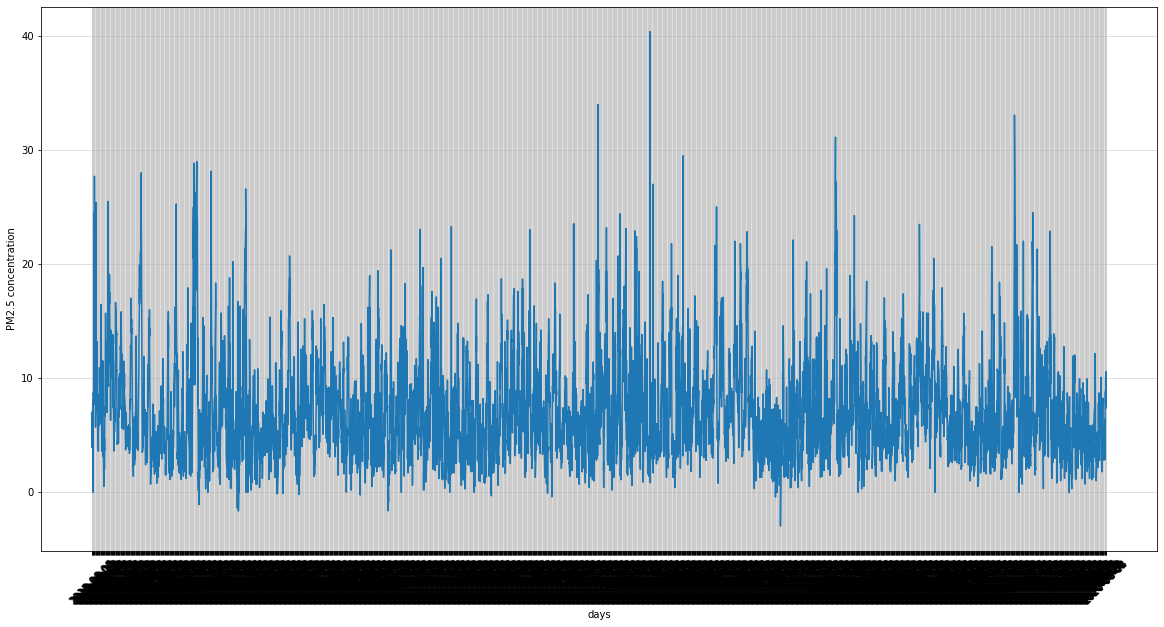

In [40]:
plt.figure(figsize=(20,10))
plt.plot(x['Date Local'], x['Arithmetic Mean'])

plt.xticks(rotation = 45)
plt.xlabel('days')
plt.ylabel('PM2.5 concentration')
plt.grid(alpha = 0.5)
plt.show()

In [42]:
cds = gpd.read_file("/Users/dinawagdy/Documents/NYU CUSP/Semesters/Spring 2021/Applied Data Science/Project/CUSP2021ADS-Team-main/data/shp/nycd.shp")
cds = cds.to_crs(epsg = 4326)

<AxesSubplot:>

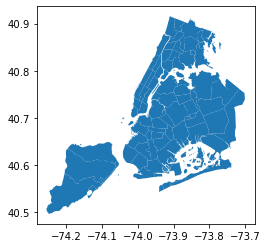

In [50]:
cds.plot()

In [56]:
geometry = [Point(xy) for xy in zip(df_monitors['Longitude'],df_monitors['Latitude'])]
geo_df_monitors = gpd.GeoDataFrame(df_monitors, crs = 4326,geometry = geometry)
geo_df_monitors = geo_df_monitors.drop(columns = ['Latitude','Longitude'])

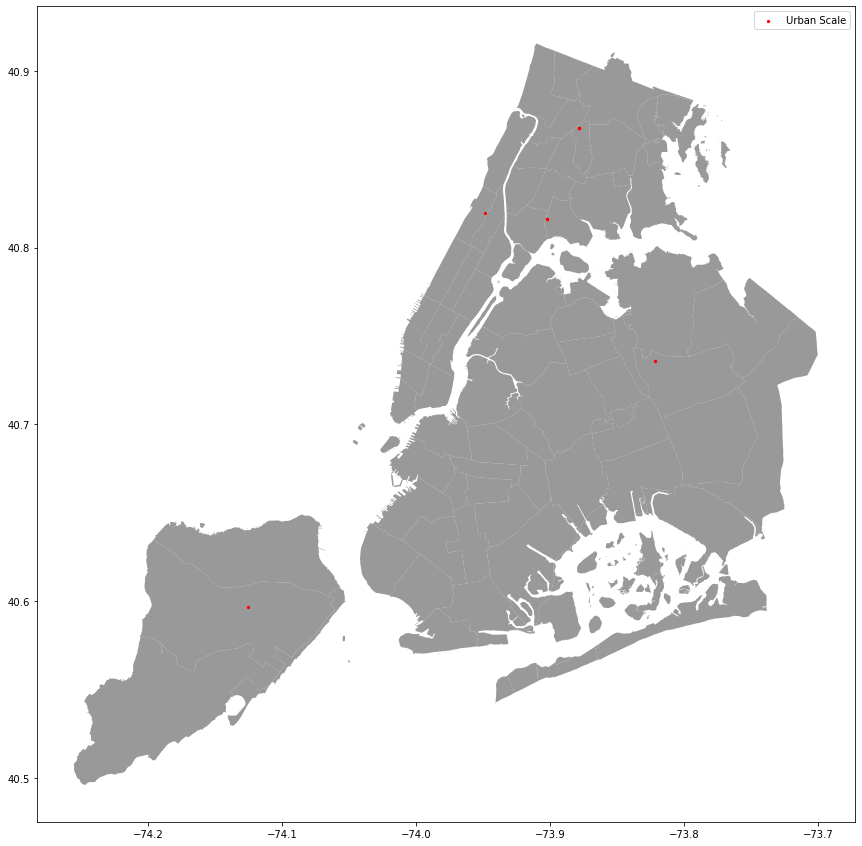

In [69]:
fig,ax = plt.subplots(figsize = (15,15))
cds.plot(ax = ax, alpha = 0.8, color = 'grey')
geo_df_monitors.loc[(geo_df_monitors['Measurement Scale']=='URBAN SCALE')&\
                   (geo_df_monitors['Site Number'].isin([110, 133, 135, 124, 67]))].\
                    plot(ax=ax,markersize = 5, marker = 'o',color = 'red', label = 'Urban Scale')
plt.legend(prop={'size':10}) #covers 4km to 50km

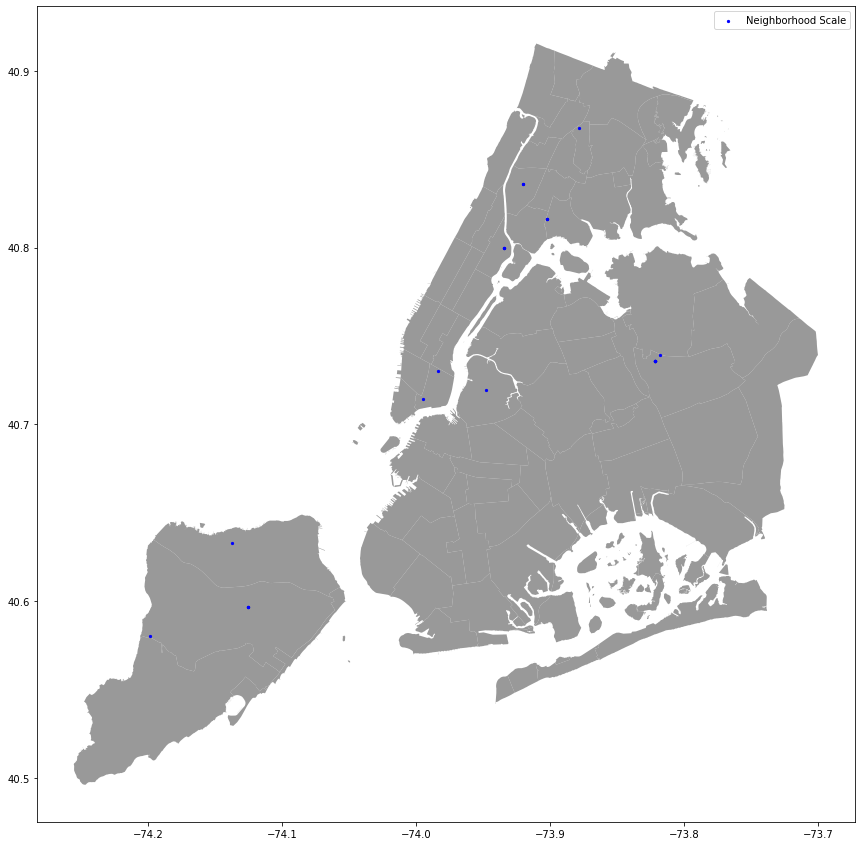

In [70]:
fig,ax = plt.subplots(figsize = (15,15))
cds.plot(ax = ax, alpha = 0.8, color = 'grey')
geo_df_monitors.loc[(geo_df_monitors['Measurement Scale']=='NEIGHBORHOOD')&\
                   (geo_df_monitors['Site Number'].isin([80, 110, 133, 122, 79,128,134,124,125,55,67,111]))].\
                    plot(ax=ax,markersize = 5,color = 'blue', label = 'Neighborhood Scale')
plt.legend(prop={'size':10}) #100m to 500m

In [84]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

# Example
b = geodesic_point_buffer(45.4, -75.7, 100.0)
b.plot

lat = [the list of lat coordinates here] 
lon = [the list of lon coordinates here] 

x, y = m(lon, lat)
m.plot(x, y, 'o-', markersize=5, linewidth=1) 


AttributeError: 'list' object has no attribute 'plot'

<AxesSubplot:>

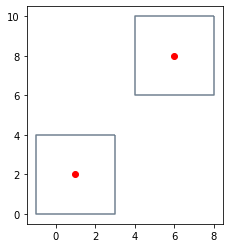

In [49]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Generate some sample data 
p1 = Point((1,2))
p2 = Point((6,8))
points = gpd.GeoSeries([p1,p2])

# Buffer the points using a square cap style
# Note cap_style: round = 1, flat = 2, square = 3
buffer = points.buffer(2, cap_style = 3)

# Plot the results
fig, ax1 = plt.subplots()
buffer.boundary.plot(ax=ax1, color = 'slategrey')
points.plot(ax = ax1, color = 'red')

In [73]:
def generate_buffer_meter(data, radiu, geometry='geometry', crs='epsg:4326'):
    data = gpd.GeoDataFrame(data, geometry=geometry, crs=crs)
    data = data.to_crs('+proj=aeqd +units=m  +x_0=0 +y_0=0')
    data[geometry] = data[geometry].buffer(radiu)
    data = data.to_crs(crs)
    return data
generate_buffer_meter((45.4, -75.7),50,geometry = geometry)

ValueError: Length of values (45) does not match length of index (2)

In [79]:
import math
import numpy as np

In [81]:
polygonSides = 360
lat = (40.836060*111.320)*1000
lonNum = 111320*math.cos(40.836060)
lon = abs(-73.92)*111320

points_list = [ (-1*((lon + np.sin(angle)*0.1)/111320), (lat + np.cos(angle)*0.1)/111320) 
for angle in np.linspace(0, 2*np.pi, polygonSides, endpoint = False) ]